In [4]:
from src.utils import read_split_csv, read_complete
from src.hgbr import *

# Load data
(quadricoptere dataset)

In [5]:
data = read_complete("/Data")
data

val.csv
train.csv
test.csv
lourd.csv


,time_start,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,route,power,power_smoothed
index,,,,,,,,,,,,,,,,,,,,,
112,2019-04-07 10:13:00,1,0.00,1.4,37.0,24.178350,0.389637,-79.782396,40.458047,270.407091,...,-0.000479,0.033248,-0.114812,-9.824341,4,0,25,R5,9.420778,9.420778
113,2019-04-07 10:13:00,1,0.21,1.4,36.0,23.517269,6.154673,-79.782396,40.458047,270.432353,...,0.011397,0.042173,-0.108319,-9.837841,4,0,25,R5,144.741104,144.741104
114,2019-04-07 10:13:00,1,0.31,1.4,42.0,24.109488,1.025779,-79.782396,40.458047,270.433609,...,0.017794,0.005411,-0.188141,-9.812851,4,0,25,R5,24.731003,24.731003
115,2019-04-07 10:13:00,1,0.50,1.4,42.0,24.189619,0.278312,-79.782396,40.458047,270.459037,...,-0.005043,0.034055,-0.114786,-9.808225,4,0,25,R5,6.732263,6.732263
116,2019-04-07 10:13:00,1,0.61,1.3,41.0,24.192123,0.389637,-79.782396,40.458047,270.460150,...,-0.012929,0.008335,-0.094107,-9.812603,4,0,25,R5,9.426145,9.426145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257756,2019-10-24 10:10:00,279,116.11,2.6,180.0,22.400438,3.276131,-79.782783,40.459020,270.146941,...,0.004261,0.451632,-0.372928,-9.812629,10,0,25-50-100-25,R7,73.386768,73.386768
257757,2019-10-24 10:10:00,279,116.30,2.6,180.0,22.379154,3.673720,-79.782783,40.459020,270.168574,...,0.044291,0.421674,-0.361034,-9.817332,10,0,25-50-100-25,R7,82.214738,82.214738
257758,2019-10-24 10:10:00,279,116.40,2.8,181.0,22.379154,3.824803,-79.782783,40.459020,270.164794,...,-0.005242,0.411875,-0.279831,-9.797699,10,0,25-50-100-25,R7,85.595864,85.595864


In [6]:
# remove columns 
cols_ignored = ["time_start","battery_voltage","battery_current", "altitude","speed","route", "position_x", "position_y", "flight"]
cols_redundent = ["linear_acceleration_x", "velocity_y"]
target = ["power", "power_smoothed"]

X = data.drop(columns = cols_ignored + cols_redundent + target)
X

,time,wind_speed,wind_angle,position_z,orientation_x,orientation_y,orientation_z,orientation_w,velocity_x,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_y,linear_acceleration_z,payload
index,,,,,,,,,,,,,,,,
112,0.00,1.4,37.0,270.407091,0.001720,0.006205,-0.253333,0.967358,-0.002432,0.012458,0.007095,0.007995,-0.000479,-0.114812,-9.824341,0
113,0.21,1.4,36.0,270.432353,0.001805,0.006146,-0.253320,0.967361,-0.005957,0.014279,0.023892,-0.001515,0.011397,-0.108319,-9.837841,0
114,0.31,1.4,42.0,270.433609,0.001692,0.006400,-0.253269,0.967373,-0.017549,0.011364,-0.058678,0.020939,0.017794,-0.188141,-9.812851,0
115,0.50,1.4,42.0,270.459037,0.001717,0.006165,-0.253344,0.967355,-0.010196,0.011466,0.000013,-0.005369,-0.005043,-0.114786,-9.808225,0
116,0.61,1.3,41.0,270.460150,0.001703,0.006054,-0.253208,0.967391,-0.009259,0.011488,0.000341,0.005684,-0.012929,-0.094107,-9.812603,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257756,116.11,2.6,180.0,270.146941,0.020484,0.017983,0.011347,0.999564,0.038757,-0.047724,0.003752,-0.003594,0.004261,-0.372928,-9.812629,0
257757,116.30,2.6,180.0,270.168574,0.020504,0.017502,0.011056,0.999575,0.030060,-0.037571,-0.042004,0.011623,0.044291,-0.361034,-9.817332,0
257758,116.40,2.8,181.0,270.164794,0.020545,0.017249,0.011084,0.999579,0.037211,-0.038548,-0.009871,-0.018115,-0.005242,-0.279831,-9.797699,0


In [8]:
datasets = read_split_csv("/Data")
datasets["val"]

val.csv
train.csv
test.csv
lourd.csv


,time_start,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,route,power,power_smoothed
index,,,,,,,,,,,,,,,,,,,,,
109923,2019-07-03 03:10:00,150,35.50,2.8,238.0,22.759777,23.505444,-79.782777,40.458953,365.169441,...,-0.076906,0.335496,-0.143232,-9.869870,12,0,100,R1,534.978656,537.998819
91658,2019-06-29 12:40:00,136,78.60,9.4,4.0,21.084534,26.065914,-79.782571,40.458586,290.375622,...,-0.082310,-1.529684,0.423300,-9.976319,8,250,25,R1,549.587645,526.000169
200354,2019-07-24 16:28:00,229,62.60,10.5,204.0,22.172565,18.448116,-79.782210,40.458218,315.845911,...,0.015051,-1.633767,0.061935,-9.457129,10,0,50,R1,409.042066,432.243997
122937,2019-07-03 16:35:00,162,3.10,0.9,265.0,21.716820,24.189297,-79.782738,40.458992,276.467557,...,-0.054514,0.133585,-0.133318,-10.589297,8,500,75,R1,525.314597,536.179872
164684,2019-07-15 08:05:00,195,112.60,2.2,128.0,23.306925,17.772215,-79.782766,40.459063,367.520864,...,0.018428,0.267958,-0.178819,-8.603159,8,250,100,R1,414.215676,420.793236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119371,2019-07-03 16:10:00,158,4.20,1.0,70.0,22.375399,21.795813,-79.782763,40.458980,270.231115,...,0.012899,0.072653,0.035458,-9.965531,12,250,75,R1,487.689996,544.146733
228319,2019-08-05 18:00:00,252,53.61,2.8,212.0,21.711811,26.304468,-79.781380,40.459499,345.136230,...,-0.000584,-0.393476,0.177744,-9.913366,12,500,75,R1,571.117643,586.617433
255344,2019-10-24 09:45:00,277,72.01,9.0,14.0,21.670494,21.390272,-79.782571,40.458526,293.235121,...,-0.107946,-0.764824,0.548552,-9.283231,10,500,25,R1,463.537766,460.171522


In [9]:
# remove columns 
cols_ignored = ["time_start","battery_voltage","battery_current", "altitude","speed","route", "position_x", "position_y", "flight"]
cols_redundent = ["linear_acceleration_x", "velocity_y"]
target = ["power", "power_smoothed"]

datasets_cleaned = dict()
for k in datasets.keys():
    datasets_cleaned[k] = datasets[k].drop(columns = cols_ignored + cols_redundent + target)

datasets_cleaned["val"]

,time,wind_speed,wind_angle,position_z,orientation_x,orientation_y,orientation_z,orientation_w,velocity_x,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_y,linear_acceleration_z,payload
index,,,,,,,,,,,,,,,,
109923,35.50,2.8,238.0,365.169441,0.019652,-0.009543,-0.892996,0.449534,-0.079833,3.000340,0.006295,0.028133,-0.076906,-0.143232,-9.869870,0
91658,78.60,9.4,4.0,290.375622,-0.065850,-0.020889,0.102929,0.992287,-0.505729,0.908372,0.071907,0.034870,-0.082310,0.423300,-9.976319,250
200354,62.60,10.5,204.0,315.845911,-0.020135,-0.081124,0.972382,0.217915,0.079185,1.620667,-0.015960,0.032285,0.015051,0.061935,-9.457129,0
122937,3.10,0.9,265.0,276.467557,-0.029125,-0.007355,-0.769531,0.637903,-0.045260,0.282797,0.178007,0.083491,-0.054514,-0.133318,-10.589297,500
164684,112.60,2.2,128.0,367.520864,0.002847,0.011134,0.129321,0.991536,0.140437,-1.149955,-0.005068,0.014159,0.018428,-0.178819,-8.603159,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119371,4.20,1.0,70.0,270.231115,-0.001946,-0.004951,-0.731368,0.681962,0.014317,0.171766,-0.027388,0.043483,0.012899,0.035458,-9.965531,250
228319,53.61,2.8,212.0,345.136230,-0.028327,-0.122869,0.967072,0.221073,0.018804,1.762058,-0.044206,0.016506,-0.000584,0.177744,-9.913366,500
255344,72.01,9.0,14.0,293.235121,-0.013434,-0.028738,0.109309,0.993502,-0.773985,-0.051941,0.131445,-0.257779,-0.107946,0.548552,-9.283231,500


# HistGradientBoostingRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor

## Model training

==Shuffled data==
La durée d'exécution est de 0 minutes et 3 secondes.
Root of Mean Squared Error: 33.83644107107892
R² score : 89.71804318898162


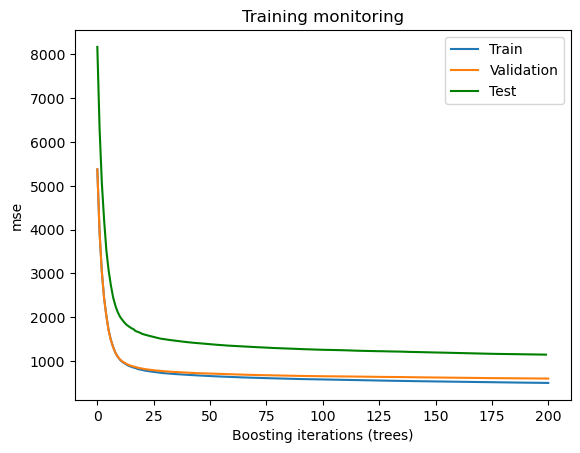

==Grouped by flight==
La durée d'exécution est de 0 minutes et 3 secondes.
Root of Mean Squared Error: 38.83737679116986
R² score : 84.4665941580145


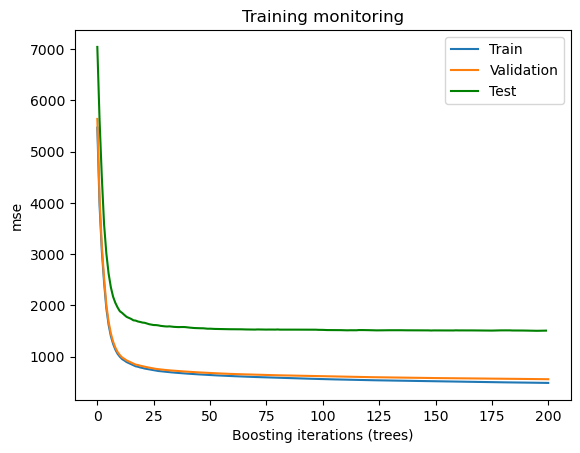

Median of neg_root_mean_squared_error
-38.49 +- 1.81


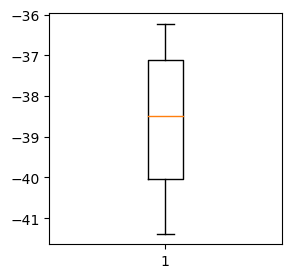

Score in percentage
Median of r2
85.8 +- 1.63


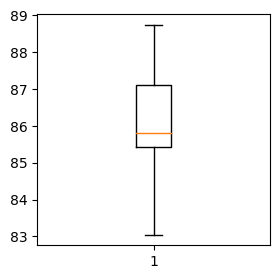

In [10]:
seed = 42
train_evaluate(X, data.power_smoothed , data.flight, seed, n_splits=10, max_iter=200, learning_rate=0.3)

## Evaluation

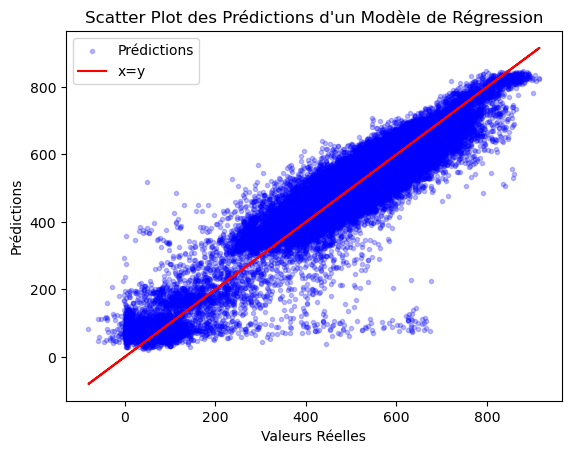

In [11]:
scatter_predictions(X, data.power_smoothed, seed)